In [1]:
import holidays
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.random.seed(32)
us_holidays = holidays.UnitedStates()

# Generate customer IDs

In [2]:
def setage(age):
    '''
    function to limit the age between 18 and 65.
    if age is 16, it will be updated to 18 + abs(18-16)
    if age is 68, it will be updated to 65 - abs(65-68)
    '''
    if (age < 18):
        age = 18 + abs(18-age)
    if (age > 65):
        age = 65 - abs(65-age)
    return (age)

# test function 
print (setage(35))
print (setage(16))
print (setage(68))

35
20
62


In [3]:
def gencustID(startID = '100000'):
    '''
    function to generate customer ID, gender and age for each customer
    gender distribution: women: 40% and men 60%
    age distribution: women: mean 33, sd 10; men: mean 40 and sd 10
    customer ID: differs from previous customer ID by a random int between 3 and 13
    '''
    # get gender & age
    # if male, mean age is 40,
    # if female, mean age is 33
    if (np.random.random() < 0.4):
        G = 'F'
        age = int(np.random.normal(33, 10)) 
    else:
        G = 'M'
        age = int(np.random.normal(40, 10))
        
    # correct age for outliers
    age = setage(age)
        
    add  = np.random.randint(3, 13)
    custID = str(int(startID) + add)
                
    return (custID, G, age)

# test function
print (gencustID())

('100011', 'M', 49)


## Loop to generate customer IDs

In [4]:
# Loop to generate customer ids
nids = 5000  # no of customer IDs
cid = 100000 # starting ID
clist = [] # list to collect the data

# loop to generate
for i in range(nids):
    cid, g, age = gencustID(cid)
    clist.append((cid, g, age))
    
# convert this to data frame    
cldf = pd.DataFrame(clist)
cldf.columns = ['Customer ID', 'Gender', 'Age']
cldf.head()

,Customer ID,Gender,Age
0,100010,M,19
1,100014,M,54
2,100025,F,49
3,100032,M,58
4,100044,M,19


In [6]:
cldf.to_csv('CustomerTable.csv', index=False)

## Analysis of generated data

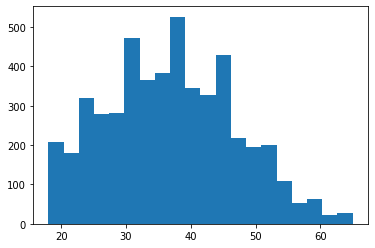

In [7]:
plt.hist(cldf['Age'], bins=20)
plt.show()

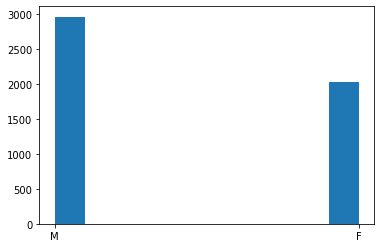

In [8]:
plt.hist(cldf['Gender'])
plt.show()

# Generate transactions

In [9]:
def dateupdate(date):
  '''
  function to update date and time 
  if visit time is beyond 10 pm in the night, 
  it is moved to next date after 5 am, by adding 7 hours
  '''
  if (int(str(date)[11:13]) >= 22):
      date = date + np.timedelta64(7, 'h')
  return (date)

print (dateupdate(np.datetime64('2021-01-01T11:33:24')))
print (dateupdate(np.datetime64('2021-01-01T23:45:00')))

2021-01-01T11:33:24
2021-01-02T06:45:00


In [10]:
def genrecord(cidlist, time = np.datetime64('2020-01-01T06:00:00')):
  '''
  generate one new record of visit, based on customer id list, 
  and start time provided
  ad is chosen randomly from among the 5 ads
  '''

  #get customer ID
  cid = np.random.choice(cidlist)
  
  #pick a time
  delta = np.random.randint(25, 500)
  time = time + np.timedelta64(delta, 's')
  
  # update time
  time = dateupdate(time)
  
  # choose an ad id
  adid = np.random.randint(1, 6)

  return (cid, time, adid)

# test function
print (genrecord(['100001']))

('100001', numpy.datetime64('2020-01-01T06:01:04'), 5)


In [11]:
cidlist = list(cldf['Customer ID'])
print (len(cidlist))

5000


## Loop to generate transaction data

In [12]:
newdate = np.datetime64('2020-01-01T07:00:00')
print ('starting date is: ', newdate)
reclist = []
nrec = 100000  # no of records needed


for i in range(nrec):
    cid, newdate, adid = genrecord(cidlist, newdate)
    #print (cid, newdate, adid)
    
    #move to next date if time exceeds 10pm
    newdate = dateupdate(newdate)
    
    reclist.append((cid, newdate, adid))
    
recdf = pd.DataFrame(reclist)
recdf.columns = ['Customer ID', 'Date Time', 'Ad ID']   
recdf.head() 

starting date is:  2020-01-01T07:00:00


,Customer ID,Date Time,Ad ID
0,117058,2020-01-01 07:05:39,2
1,119395,2020-01-01 07:08:48,1
2,129738,2020-01-01 07:14:54,1
3,137454,2020-01-01 07:21:11,4
4,107230,2020-01-01 07:23:53,4


In [13]:
recdf.tail()

,Customer ID,Date Time,Ad ID
99995,102959,2021-03-03 08:39:20,3
99996,119175,2021-03-03 08:39:53,4
99997,106251,2021-03-03 08:48:03,4
99998,115279,2021-03-03 08:50:28,5
99999,109909,2021-03-03 08:54:29,2


In [14]:
recdf.to_csv('TransactionList.csv', index=False)

# Combine Customer ID and transaction data to augment information

In [15]:
# add conversion rates to recdf
recdf['Customer ID'] = recdf['Customer ID'].astype(int)
cldf['Customer ID'] = cldf['Customer ID'].astype(int)

In [16]:
# merge both data sets, to add gender and age to transaction ID 
df = recdf.join(cldf.set_index('Customer ID'), how= 'left', on='Customer ID')

In [17]:
#df.to_csv('TxnDB.csv')

In [18]:
df.head()

,Customer ID,Date Time,Ad ID,Gender,Age
0,117058,2020-01-01 07:05:39,2,M,38
1,119395,2020-01-01 07:08:48,1,M,36
2,129738,2020-01-01 07:14:54,1,F,32
3,137454,2020-01-01 07:21:11,4,M,32
4,107230,2020-01-01 07:23:53,4,M,40


In [19]:
# read data again to process

In [20]:
#df = pd.read_csv('TxnDB.csv', index_col=0)

In [21]:
df.head()

,Customer ID,Date Time,Ad ID,Gender,Age
0,117058,2020-01-01 07:05:39,2,M,38
1,119395,2020-01-01 07:08:48,1,M,36
2,129738,2020-01-01 07:14:54,1,F,32
3,137454,2020-01-01 07:21:11,4,M,32
4,107230,2020-01-01 07:23:53,4,M,40


## Add holidays to the dates in the transaction table

In [22]:
df['Holiday'] = df['Date Time'].apply(lambda x: us_holidays.get(str(x)[:10]))
df.head()

,Customer ID,Date Time,Ad ID,Gender,Age,Holiday
0,117058,2020-01-01 07:05:39,2,M,38,New Year's Day
1,119395,2020-01-01 07:08:48,1,M,36,New Year's Day
2,129738,2020-01-01 07:14:54,1,F,32,New Year's Day
3,137454,2020-01-01 07:21:11,4,M,32,New Year's Day
4,107230,2020-01-01 07:23:53,4,M,40,New Year's Day


In [23]:
df['Holiday'].unique()

array(["New Year's Day", None, 'Martin Luther King Jr. Day',
       "Washington's Birthday", 'Memorial Day',
       'Independence Day (Observed)', 'Independence Day', 'Labor Day',
       'Columbus Day', 'Veterans Day', 'Thanksgiving', 'Christmas Day'],
      dtype=object)

## Add Weekday/weekend info to the dates in the transaction table. Working is weekday

In [24]:
df['Working'] = df['Date Time'].apply(lambda x: np.is_busday(str(x)[:10]))

In [25]:
df.head()

,Customer ID,Date Time,Ad ID,Gender,Age,Holiday,Working
0,117058,2020-01-01 07:05:39,2,M,38,New Year's Day,True
1,119395,2020-01-01 07:08:48,1,M,36,New Year's Day,True
2,129738,2020-01-01 07:14:54,1,F,32,New Year's Day,True
3,137454,2020-01-01 07:21:11,4,M,32,New Year's Day,True
4,107230,2020-01-01 07:23:53,4,M,40,New Year's Day,True


In [26]:
df['Working'].unique()

array([ True, False])

## Get conversion probabilites for different ads from different age groups

In [27]:
def getconvprobs(row, date = '2020-01-01'):
  '''
  THIS FUNCTION SIMULATES THE ACTUAL WORLD
  normal probability is between 0 and 0.2
  for some gender-age-ad combinations, the probability is higher
  
  ''' 

  date = str(row['Date Time'])[:10]
  probs = 0.2 * np.random.random()
  
  # set specific conditions
  # Ad 1 is liked by young men, with a conversion rate of 0.8
  if ((row['Ad ID'] == 1) & (row['Gender'] == 'M') & (row['Age'] < 40)):
      probs = 0.82
      if (date > '2020-03-01'):
        probs = 0.2

  # Ad 2 is liked by young women, with a conversion rate of 0.7
  if ((row['Ad ID'] == 2) & (row['Gender'] == 'F') & (row['Age'] < 37)):
      probs = 0.73
  
  # Ad 3 is liked by old people , with a conversion rate of 0.7
  if ((row['Ad ID'] == 3) & (row['Age'] > 50)):
      probs = 0.67
      
  # Ad 4 is liked by people from 40 to 50 years of age 
  if ((row['Ad ID'] == 4) & (row['Age'] >= 40) & (row['Age'] <= 50)):
      probs = 0.54

  if ((row['Ad ID'] == 5) & (row['Gender'] == 'M') & (row['Age'] < 40)):
      probs = 0.12
      if (date > '2020-03-01'):
        probs = 0.72

  if (row['Working'] == 'False'):
      probs += 0.05
      
  if (row['Holiday'] != None):
      probs += 0.1
      
  probs += 0.005 * abs(row['Age'] - 35) - 0.1
        
  return (max(round(probs, 2), 0))

In [28]:
def convprobstest(row, date = '2020-01-01'):
    date = str(row['Date Time'])[:10]
    probs = 0.05 * np.random.random()
    
    if (date < '2020-04-01'):
      if (row['Ad ID'] == 1):
        probs = 0.3
      elif (row['Ad ID'] == 2):
        probs = 0.2
    else:
      if (row['Ad ID'] == 2):
        probs = 0.4
    return (round(probs, 2))

In [29]:
def click(probs):
  '''
  set the ad as clicked or not, based on the probability
  '''
  if (np.random.random() < probs):
      return 1
  else:
      return 0

In [30]:
df['probs'] = df.apply(convprobstest, axis=1)

In [31]:
df.head()

,Customer ID,Date Time,Ad ID,Gender,Age,Holiday,Working,probs
0,117058,2020-01-01 07:05:39,2,M,38,New Year's Day,True,0.20
1,119395,2020-01-01 07:08:48,1,M,36,New Year's Day,True,0.30
2,129738,2020-01-01 07:14:54,1,F,32,New Year's Day,True,0.30
3,137454,2020-01-01 07:21:11,4,M,32,New Year's Day,True,0.00
4,107230,2020-01-01 07:23:53,4,M,40,New Year's Day,True,0.05


In [32]:
df['click'] = df['probs'].apply(lambda x: click(x))

In [33]:
df.head()

,Customer ID,Date Time,Ad ID,Gender,Age,Holiday,Working,probs,click
0,117058,2020-01-01 07:05:39,2,M,38,New Year's Day,True,0.20,0
1,119395,2020-01-01 07:08:48,1,M,36,New Year's Day,True,0.30,0
2,129738,2020-01-01 07:14:54,1,F,32,New Year's Day,True,0.30,1
3,137454,2020-01-01 07:21:11,4,M,32,New Year's Day,True,0.00,0
4,107230,2020-01-01 07:23:53,4,M,40,New Year's Day,True,0.05,0


In [ ]:
a = np.datetime64('2020-01-01T07:04:16')
print (a)

2020-01-01T07:04:16


In [ ]:
str(a)[:10]

'2020-01-01'

In [34]:
df.to_csv('TestFinalDataSet.csv', index=False)

# Analysis of generated data

In [35]:
print ('total number of records:', len(df))
print ('number of clicks:',  df['click'].sum())

total number of records: 100000
number of clicks: 10221


In [ ]:
df.to_csv('AdClickInfo.csv', index=False)

In [ ]:
df = pd.read_csv('AdClickInfo.csv')
df.head()

,Customer ID,Date Time,Ad ID,Gender,Age,Holiday,Working,probs,click
0,117058,2020-01-01 07:05:39,2,M,38,New Year's Day,True,0.046507,0
1,119395,2020-01-01 07:08:48,1,M,36,New Year's Day,True,0.825000,0
2,129738,2020-01-01 07:14:54,1,F,32,New Year's Day,True,0.161223,0
3,137454,2020-01-01 07:21:11,4,M,32,New Year's Day,True,0.023516,0
4,107230,2020-01-01 07:23:53,4,M,40,New Year's Day,True,0.565000,1


### Daily analysis of CTR

In [ ]:
print ('starting day is', df['Date Time'].min())
print ('ending day is', df['Date Time'].max())

starting day is 2020-01-01 07:05:39
ending day is 2021-03-03 08:54:29


In [ ]:
df['Date'] = df['Date Time'].apply(lambda x: str(x)[:10])

In [ ]:
dfdaily = df[['click', 'Date']].groupby('Date').agg(['count', 'mean']).reset_index()
dfdaily.head()

Date click          
              count      mean
0  2020-01-01   201  0.223881
1  2020-01-02   239  0.158996
2  2020-01-03   236  0.173729
3  2020-01-04   238  0.172269
4  2020-01-05   241  0.165975

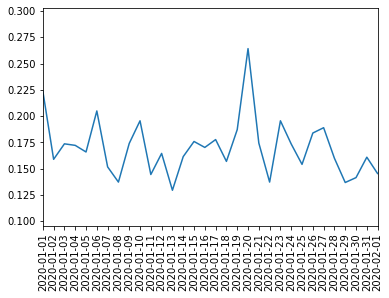

In [ ]:
plt.plot(dfdaily['Date'], dfdaily['click']['mean'])
plt.xlim('2020-01-01', '2020-02-01')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.loc[df['Holiday'].isna(), 'Holiday'] = "NoHoliday"
df.head()

,Customer ID,Date Time,Ad ID,Gender,Age,Holiday,Working,probs,click,Date
0,117058,2020-01-01 07:05:39,2,M,38,New Year's Day,True,0.046507,0,2020-01-01
1,119395,2020-01-01 07:08:48,1,M,36,New Year's Day,True,0.825000,0,2020-01-01
2,129738,2020-01-01 07:14:54,1,F,32,New Year's Day,True,0.161223,0,2020-01-01
3,137454,2020-01-01 07:21:11,4,M,32,New Year's Day,True,0.023516,0,2020-01-01
4,107230,2020-01-01 07:23:53,4,M,40,New Year's Day,True,0.565000,1,2020-01-01


In [ ]:
df['Holiday'].unique()

array(["New Year's Day", 'NoHoliday', 'Martin Luther King Jr. Day',
       "Washington's Birthday", 'Memorial Day',
       'Independence Day (Observed)', 'Independence Day', 'Labor Day',
       'Columbus Day', 'Veterans Day', 'Thanksgiving', 'Christmas Day'],
      dtype=object)

In [ ]:
coll = df.columns
reqcoll = coll[[3,4,5,6]]
print (reqcoll)

Index(['Gender', 'Age', 'Holiday', 'Working'], dtype='object')


~~~~~~~~~~~~~~~~~~~~
Gender
  Gender  click          
          count      mean
0      F  40718  0.153716
1      M  59282  0.171064


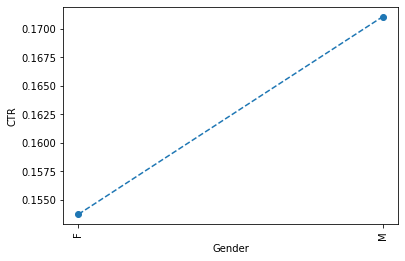

~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~
Age
  Age click          
      count      mean
0  18   947  0.229145
1  19  1531  0.193338
2  20  1730  0.202312
3  21  1762  0.218502
4  22  1852  0.201944


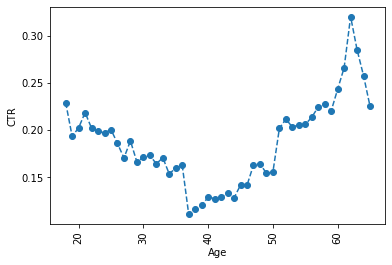

~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~
Holiday
                       Holiday click          
                               count      mean
0                Christmas Day   230  0.230435
1                 Columbus Day   231  0.285714
2             Independence Day   233  0.231760
3  Independence Day (Observed)   240  0.200000
4                    Labor Day   240  0.229167


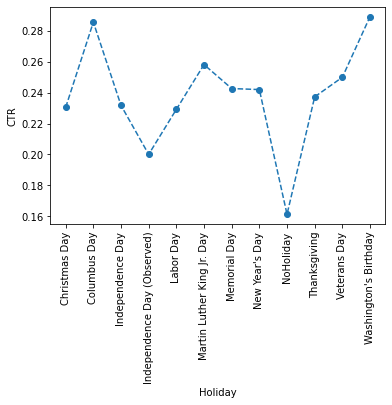

~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~
Working
  Working  click          
           count      mean
0   False  28597  0.163094
1    True  71403  0.164363


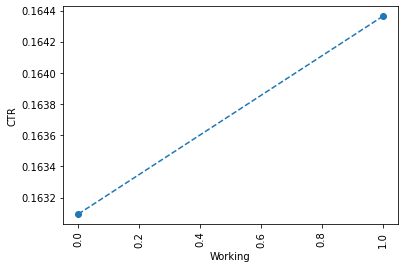

~~~~~~~~~~~~~~~~~~~~


In [ ]:
for c in reqcoll:
    print ('~~~~~~~~~~~~~~~~~~~~')
    print (c)
    df1 = df[[c, 'click']].groupby(c).agg(['count', 'mean']).reset_index()
    print (df1.head())
    plt.plot(df1[c],df1['click']['mean'], 'o--')
    plt.xticks(rotation=90)
    plt.xlabel(c)
    plt.ylabel('CTR')
    plt.show()
    print ('~~~~~~~~~~~~~~~~~~~~')

## Group by two features

In [ ]:
df11 = df[['Age', 'Ad ID', 'click']].groupby(['Age', 'Ad ID']).agg(['count', 'mean']).reset_index()

In [ ]:
df11

Age Ad ID click          
              count      mean
0    18     1   195  0.143590
1    18     2   205  0.643902
2    18     3   166  0.096386
3    18     4   198  0.085859
4    18     5   183  0.131148
..   ..   ...   ...       ...
235  65     1    21  0.142857
236  65     2    19  0.000000
237  65     3    22  0.818182
238  65     4    28  0.142857
239  65     5    21  0.000000

[240 rows x 4 columns]

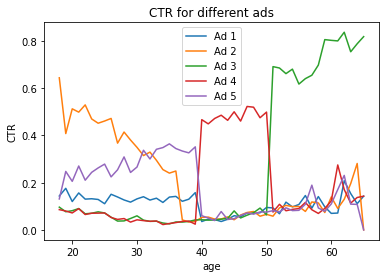

In [ ]:
for i in range(1, 6):
    df111 = df11[df11['Ad ID'] == i]
    plt.plot(df111['Age'], df111['click']['mean'])
    
plt.legend(['Ad 1', 'Ad 2', 'Ad 3', 'Ad 4', 'Ad 5'])
plt.xlabel('age')
plt.ylabel('CTR')
plt.title('CTR for different ads')
plt.show()

In [ ]:
def retagebin(age):
  '''
  function to return age bins
  '''
  if (age < 25):
      return 1
  else:
      x = (age - 25)/5 + 2
      return int(x)

# test function
print (retagebin(37))

4


In [ ]:
df['Agebin']  = df['Age'].apply(lambda x: retagebin(x))

In [ ]:
df.head()

,Customer ID,Date Time,Ad ID,Gender,Age,Holiday,Working,probs,click,Date,Agebin
0,117058,2020-01-01 07:05:39,2,M,38,New Year's Day,True,0.046507,0,2020-01-01,4
1,119395,2020-01-01 07:08:48,1,M,36,New Year's Day,True,0.825000,0,2020-01-01,4
2,129738,2020-01-01 07:14:54,1,F,32,New Year's Day,True,0.161223,0,2020-01-01,3
3,137454,2020-01-01 07:21:11,4,M,32,New Year's Day,True,0.023516,0,2020-01-01,3
4,107230,2020-01-01 07:23:53,4,M,40,New Year's Day,True,0.565000,1,2020-01-01,5


In [ ]:
df21 = df[['Agebin', 'Ad ID', 'click']].groupby(['Agebin', 'Ad ID']).agg(['count', 'mean']).reset_index()

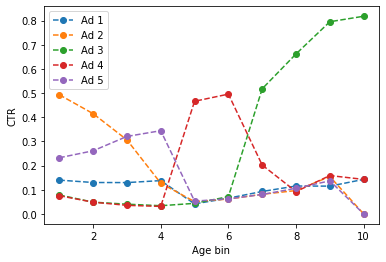

In [ ]:
for i in range(1, 6):
    dfx = df21[df21['Ad ID'] == i]
    plt.plot(dfx['Agebin'], dfx['click']['mean'], 'o--')
plt.legend(['Ad 1', 'Ad 2', 'Ad 3', 'Ad 4', 'Ad 5'])
plt.xlabel('Age bin')
plt.ylabel('CTR')
plt.show()


In [ ]:
# Check behaviour over time

In [ ]:
df['Month'] = df['Date'].apply(lambda x: x[:7])
df.head()

,Customer ID,Date Time,Ad ID,Gender,Age,Holiday,Working,probs,click,Date,Agebin,Month
0,117058,2020-01-01 07:05:39,2,M,38,New Year's Day,True,0.046507,0,2020-01-01,4,2020-01
1,119395,2020-01-01 07:08:48,1,M,36,New Year's Day,True,0.825000,0,2020-01-01,4,2020-01
2,129738,2020-01-01 07:14:54,1,F,32,New Year's Day,True,0.161223,0,2020-01-01,3,2020-01
3,137454,2020-01-01 07:21:11,4,M,32,New Year's Day,True,0.023516,0,2020-01-01,3,2020-01
4,107230,2020-01-01 07:23:53,4,M,40,New Year's Day,True,0.565000,1,2020-01-01,5,2020-01


# Plot CTR as function of age group

60393


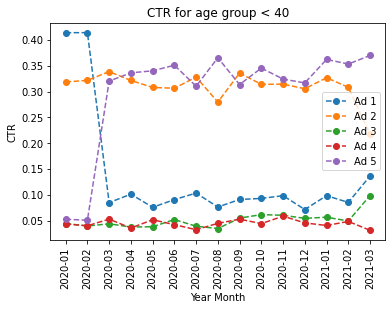

In [ ]:
dft = df[df['Age'] < 40]
print (len(dft))
dft2 = dft.groupby(['Month', 'Ad ID']).agg(['count', 'mean']).reset_index()
dft2.head()

for i in range(1,6):
  dftemp = dft2[dft2['Ad ID'] == i]
  plt.plot(dftemp['Month'], dftemp['click']['mean'], 'o--')
  plt.xlabel('Year Month')
  plt.ylabel('CTR')

plt.title('CTR for age group < 40')
plt.legend(['Ad 1', 'Ad 2', 'Ad 3', 'Ad 4', 'Ad 5'])
plt.xticks(rotation=90)
plt.show()

# Plot CTR as function of age group & gender

29598


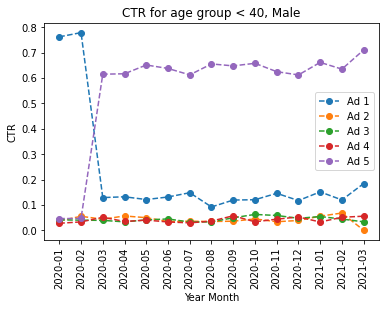

In [ ]:
dft = df[df['Age'] < 40]
dft = dft[dft['Gender'] == 'M']
print (len(dft))
dft2 = dft.groupby(['Month', 'Ad ID']).agg(['count', 'mean']).reset_index()
dft2.head()

for i in range(1,6):
  dftemp = dft2[dft2['Ad ID'] == i]
  plt.plot(dftemp['Month'], dftemp['click']['mean'], 'o--')
  plt.xlabel('Year Month')
  plt.ylabel('CTR')

plt.title('CTR for age group < 40, Male')
plt.legend(['Ad 1', 'Ad 2', 'Ad 3', 'Ad 4', 'Ad 5'])
plt.xticks(rotation=90)
plt.show()

30795


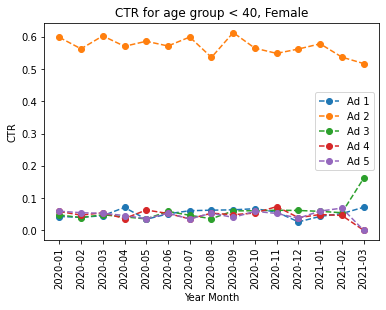

In [ ]:
dft = df[df['Age'] < 40]
dft = dft[dft['Gender'] == 'F']
print (len(dft))
dft2 = dft.groupby(['Month', 'Ad ID']).agg(['count', 'mean']).reset_index()
dft2.head()

for i in range(1,6):
  dftemp = dft2[dft2['Ad ID'] == i]
  plt.plot(dftemp['Month'], dftemp['click']['mean'], 'o--')
  plt.xlabel('Year Month')
  plt.ylabel('CTR')

plt.title('CTR for age group < 40, Female')
plt.legend(['Ad 1', 'Ad 2', 'Ad 3', 'Ad 4', 'Ad 5'])
plt.xticks(rotation=90)
plt.show()